# Data and Analysis Plan: Predicting the Impact of Ocean Acidification on Coral Reefs in the Great Barrier Reef

### Team 35
- Sophie Louie
- Angelina Shalupova


### Project Goal:

## Data

### Overview

#### Pipeline Overview

`get_ph_and_cO2()`:
    This function obtains seawater pH levels and CO2 levels from a coral sample from the Great Barrier Reef and creates a clean DataFrame. 
    Source: https://www.ncdc.noaa.gov/paleo-search/study/10425

`get_coral_calc()`:
    This function obtains and collects the coral calcification information from the Great Barrier Reef in a DataFrame. The columns represent skeletal density (grams per cubic centimeter), annual extension (linear growth, cm per year), and calcification rate (the product of skeletal density and annual extension; grams per square centimeter per year).
    Source: https://apps.aims.gov.au/metadata/view/ff433c10-ea4d-11dc-823c-00008a07204e

`get_co2_per_capita()`:
    This function obtains and collects the carbon emissions per capita data of Australia into a DataFrame.
    ** used per capita data, but per GDP data is also available **
    Source: https://data.gov.au/data/dataset/indicator-9-4-1

## Pipeline

In [1]:
import pandas as pd
from datetime import datetime

def get_ph_and_co2():
    """ Gets and cleans DataFrame of seawater ph and CO2 levels from GBR sample
    
    Returns:
        df_ph_co2 (pd.DataFrame): 
    """
    df_ph_co2 = pd.read_csv('arlington2009.csv')
    df_ph_co2.dropna(inplace=True)

    del df_ph_co2['SampleID']
    del df_ph_co2['        d13C (per mil VPDB) *c']
    del df_ph_co2['        d18O (per mil VPDB) *c']
    del df_ph_co2['        d11B (per mil) *d']
    del df_ph_co2['2sigma']
    del df_ph_co2['   2sigma mean *e']
    df_ph_co2.columns = ['Year', 'Mg/Ca (x10-3)', 'Sr/Ca (x10-3)', 'Ba/Ca (x10-6)', 'pH']
    
    bool_series = df_ph_co2['Year'] >= 1990 
    df_ph_co2 = df_ph_co2.loc[bool_series, :]
    
    bool_series = df_ph_co2['Year'] <= 2004
    df_ph_co2 = df_ph_co2.loc[bool_series, :]
    
    # set index to the year of sample taken, easier to compare to years of the other datasets
    df_ph_co2.set_index(['Year'], inplace=True)

    return df_ph_co2

    
df_ph_co2 = get_ph_and_co2()

In [2]:
def get_coral_calc():
    """Obtains, cleans, and organizes the coral calficiation data into a DataFrame
    
    Returns:
        df_coral (DataFrame) : DataFrame containing the cleaned coral calcification data (including all columns)
    """
    df_coral = pd.read_csv("GBR-coral-calcification.csv")
    df_coral.dropna(axis=0, inplace=True)
    
    del df_coral['Reef']
    df_coral.columns = ['Year', 'id', 'extension(cm/yr)', 'skel density(g/cm^3)', 'calc rate(g/cm^2/yr)']
    
    bool_series = df_coral['Year'] >= 1990 
    df_coral = df_coral.loc[bool_series, :]
    
    bool_series = df_coral['Year'] <= 2004
    df_coral = df_coral.loc[bool_series, :]
    
    df_coral = df_coral.groupby('Year').mean()
    
    # set index to the year of sample taken, easier to compare to years of the other datasets
    #df_coral.set_index(['Year'], inplace=True)
    
    return df_coral

df_coral_calc = get_coral_calc()

In [3]:
def get_australia_co2():
    """Gets and cleans historic carbon emmissions data of Autralia into a DataFrame
    
    ReturnsL:
        df_co2 (DataFrame) : DataFrame containing the cleaned carbon emissions data
    """
    df_co2 = pd.read_csv('2018-australiansdg-indicator-9-4-1-a.csv')
    df_co2.dropna(axis=0, inplace=True)
    
    bool_series = df_co2['Year'] <= 2004
    df_co2 = df_co2.loc[bool_series, :]
    
    # set index to the year of sample taken, easier to compare to years of the other datasets
    df_co2.set_index(['Year'], inplace=True)
    
    return df_co2

df_co2 = get_australia_co2()

In [4]:
# merge datasets into one dataframe
df_gbr = pd.concat([df_ph_co2, df_coral_calc, df_co2], axis=1, join='inner')
df_gbr

,Mg/Ca (x10-3),Sr/Ca (x10-3),Ba/Ca (x10-6),pH,extension(cm/yr),skel density(g/cm^3),calc rate(g/cm^2/yr),Emissionspercapita
Year,,,,,,,,
1990.0,3.896,7.707,3.33,7.92,1.449513,1.241601,1.783905,33.6
1991.0,4.093,7.694,2.99,7.92,1.321034,1.241405,1.625293,31.8
1992.0,4.078,7.698,2.58,7.99,1.514372,1.272688,1.914630,29.5
1993.0,3.888,7.727,2.64,8.14,1.439753,1.273365,1.821110,28.0
1994.0,3.966,7.690,2.86,8.09,1.435098,1.265901,1.790165,27.6
1995.0,4.111,7.619,4.12,8.08,1.446317,1.249597,1.787002,27.1
1996.0,4.311,7.606,2.88,7.88,1.491991,1.245134,1.837130,26.9
1997.0,3.998,7.713,3.22,7.71,1.435563,1.241910,1.756042,27.5
1998.0,4.351,7.610,2.92,7.57,1.330773,1.244778,1.642335,27.6


## Data Visualization

pH and CO2 changes over the years:

### Relationship between carbon emissions release and pH level

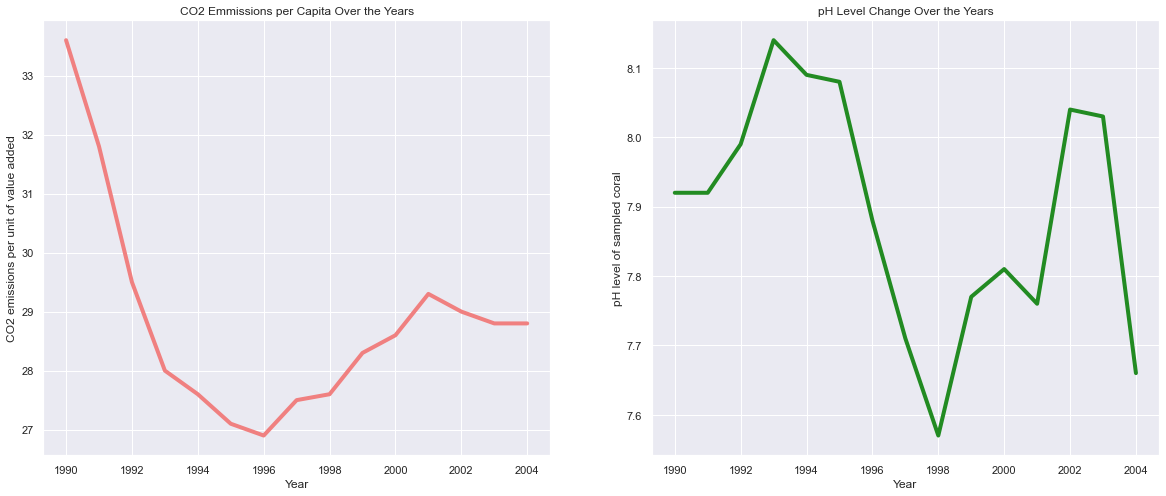

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.subplot(1,2,1)
plt.plot(df_gbr.index, df_gbr['Emissionspercapita'], color='lightcoral', linewidth=4)
# set title and x/y labels of left subplot
plt.xlabel('Year')
plt.ylabel('CO2 emissions per unit of value added')
plt.gca().title.set_text('CO2 Emissions per Capita Over the Years')

plt.subplot(1,2,2)
plt.plot(df_gbr.index, df_gbr['pH'], color='forestgreen', linewidth=4)
# set title and x/y labels of left subplot
plt.xlabel('Year')
plt.ylabel('pH level of sampled coral')
plt.gca().title.set_text('pH Level Change Over the Years')

plt.gcf().set_size_inches(20, 8)

The left graph depicts the change in carbon emissions produced by Australia from 1990 to 2004. The right graph illustrates the change in pH levels of coral sampled along the Great Barrier Reef from 1990 to 2004. It is well documented in science that as the ocean continues to absorb more CO2 in the atmosphere, the pH decreases and the ocean becomes more acidic.

As seen on the left graph, the level of CO2 emissions decreases until 1996 and thereafter consistently increases. The right graph mimics the expected effects of CO2 on ocean pH levels; as carbon emissions decrease there is less carbon for the ocean to absorb so the pH increases and the ocean becomes more basic. However, after 1996 the pH starts plumeting before briefly rising again and ultimately falling back down. As the CO2 in the atmosphere increases the ocean becomes more acidic and the pH decreases. Keep in mind that similar to global temperature, small change has SIGNIFICANT impact on the ecological balance of the earth.

Many marine organisms (including coral) that produce calcium carbonate shells or skeletons are negatively impacted by increasing CO2 levels and decreasing pH in seawater. Based on these graphs, we can reason that CO2 is a significant cause of change in pH of oceans, and the graphs portray the correlation between these two variables. 

### Relationship between pH level and coral calcification rate

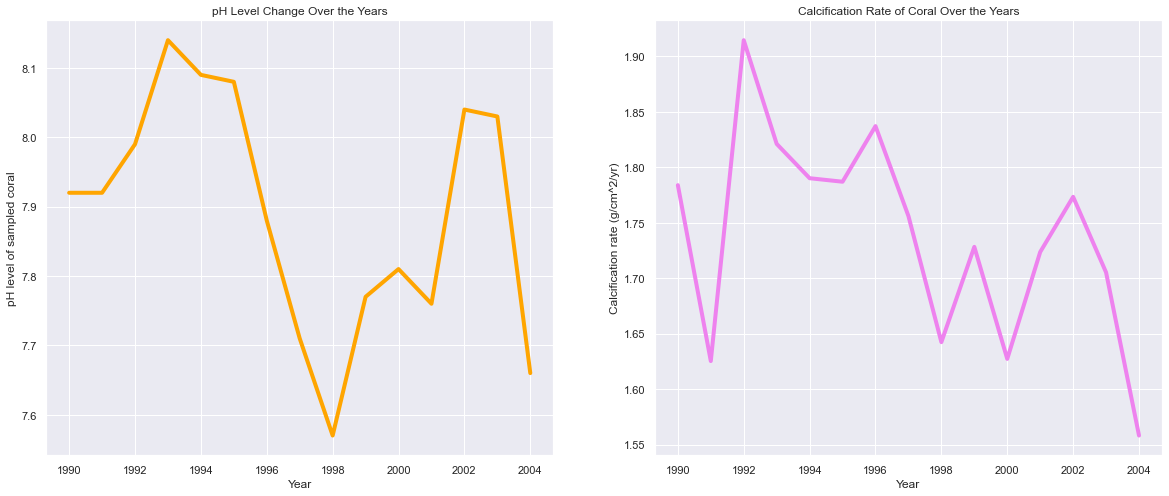

In [59]:
plt.subplot(1,2,1)
plt.plot(df_gbr.index, df_gbr['pH'], color='orange', linewidth=4)
# set title and x/y labels of left subplot
plt.xlabel('Year')
plt.ylabel('pH level of sampled coral')
plt.gca().title.set_text('pH Level Change Over the Years')

plt.subplot(1,2,2)
plt.plot(df_gbr.index, df_gbr['calc rate(g/cm^2/yr)'], color='violet', linewidth=4)
# set title and x/y labels of left subplot
plt.xlabel('Year')
plt.ylabel('Calcification rate (g/cm^2/yr)')
plt.gca().title.set_text('Calcification Rate of Coral Over the Years')

plt.gcf().set_size_inches(20, 8)

The left graph illustrates the change in pH levels of coral sampled along the Great Barrier Reef from 1990 to 2004. The right graph depicts the change in the calcification rate of the sampled coral along the Great Barrier Reef. * The coral sampled for pH levels and growth/calcification rates are different. * For reference, coral calcification is the rate at which reef-building corals lay down their calcium carbonate skeleton. It is a measure of coral growth, which is important for healthy reef ecosystems.

As discussed previously, the pH levels of the left graph reflect the change in carbon emissions and are ultimately decreasing across the time period. The right graph imitates the trend of pH; the the calcification rate increases as the pH increases and the ocean waters are more basic. This is followed by a decline and then a small climb beforing decreases again. The ocean is becoming more acidic as a result of the change in pH which is negatively impacts the abilit for coral to lay their skeleton and thus a depressed calcification rate.

Decreased calcification activity leaves the coral vulnerable to disease, stunts their growth, affects their reproduction, and can impact other species that depend on the coral communities. Coral reefs, including the Great Barrier Reef, are facing unprecedented pressure worldwide due to climate change, changes in water quality from record breaking CO2 emissions among other equally important reasons. 

In [ ]:
# corr matrix

## Analysis Plan